In [1]:
import pandas as pd

In [2]:
!ls -la

total 1568
drwxr-xr-x   20 pedrohserrano  staff     640 Jan  8 22:16 .
drwxr-xr-x+ 191 pedrohserrano  staff    6112 Jan  8 20:52 ..
-rw-r--r--@   1 pedrohserrano  staff    6148 Jan  8 21:14 .DS_Store
drwxr-xr-x   13 pedrohserrano  staff     416 Jan  8 20:51 .git
drwxr-xr-x    4 pedrohserrano  staff     128 Jan  8 21:15 .ipynb_checkpoints
-rw-r--r--@   1 pedrohserrano  staff   15703 Jan  7 17:17 Dataset Links.docx
-rw-r--r--@   1 pedrohserrano  staff   12100 Dec 12 19:04 Literature review.xlsx
-rw-r--r--    1 pedrohserrano  staff      12 Jan  8 20:41 README.md
-rw-r--r--@   1 pedrohserrano  staff   88482 Jan  7 17:12 TPI-dataset-for-download-18-September-2018.xlsx
-rwxr-xr-x@   1 pedrohserrano  staff  128270 Jan  8 20:51 data1.csv
-rwxr-xr-x@   1 pedrohserrano  staff   39086 Jan  8 20:46 data1_country.csv
-rw-rw-rw-@   1 pedrohserrano  staff   87544 Jan  7 16:10 data2.csv
-rwxr-xr-x@   1 pedrohserrano  staff  174553 Jan  8 20:52 data3.csv
-rwxr-xr-x@   1 pedrohserrano  staff   39350 Nov

In [3]:
data1 = pd.read_csv('data1.csv')

In [4]:
data1 = data1[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']]

In [5]:
data1_country = pd.read_csv('data1_country.csv')

In [6]:
data1 = pd.merge(data1, data1_country, on='Country Code', how='left')
data1 = data1[data1['Region'] == 'Europe & Central Asia']

In [7]:
data1.columns[range(10,21)]

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016'],
      dtype='object')

In [8]:
for year in data1.columns[range(10,21)]:
    data1['rate_'+str(year)] = (data1[str(int(year)+1)] / data1[str(year)]) -1

In [9]:
data1['rate_06_16'] = data1[data1.columns[range(27,38)]].mean(axis=1)

In [10]:
data1 = data1[['Country Name','rate_06_16']]

In [11]:
data1.columns = ['country','rate_06_16']

In [12]:
data1.head()

,country,rate_06_16
3,Albania,NaN
4,Andorra,NaN
8,Armenia,inf
12,Austria,0.080895
13,Azerbaijan,inf


---

In [13]:
data3 = pd.read_csv('data3.csv')

In [14]:
data3 = data3[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017']]

In [15]:
data3_country = pd.read_csv('data3_country.csv')

In [16]:
data3 = pd.merge(data3, data3_country, on='Country Code', how='left')

In [17]:
data3 = data3[data3['Region'] == 'Europe & Central Asia']

In [18]:
for year in data3.columns[range(10,21)]:
    data3['rate_'+str(year)] = (data3[str(int(year)+1)] / data3[str(year)]) -1

In [19]:
data3['rate_06_16'] = data3[data3.columns[range(27,38)]].mean(axis=1)

In [20]:
data3 = data3[['Country Name','rate_06_16']]

In [21]:
data3.columns = ['country','rate_06_16']

In [22]:
data3.head()

,country,rate_06_16
3,Albania,0.023701
4,Andorra,0.014088
8,Armenia,0.126600
12,Austria,0.031030
13,Azerbaijan,-0.002704


---

In [23]:
data2 = pd.read_csv('data2.csv')

In [24]:
data2 = data2.groupby(['Country','Year Passed']).count()['Name'].reset_index()

In [25]:
data2 = pd.pivot_table(data2, 'Name', 'Country', 'Year Passed').reset_index()

In [26]:
data2 = data2[['Country', 2005,
            2006,      2007,      2008,      2009,      2010,      2011,
            2012,      2013,      2014,      2015,      2016,      2017,
            2018]]

In [27]:
data2.head()

Year Passed,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN
2,Armenia,2.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,Austria,NaN,NaN,2.0,NaN,NaN,1.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Azerbaijan,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [28]:
data2.columns[1:]

Index([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018],
      dtype='object', name='Year Passed')

In [29]:
for year in data2.columns[2:]:
    data2['rate_'+str(year)] = (data2[year] / data2[year-1]) -1

In [30]:
data2['rate_06_16'] = data2[data2.columns[-13:-1]].mean(axis=1)

In [31]:
data2 = data2[['Country','rate_06_16']]

In [32]:
data2.columns = ['country','rate_06_16']

In [33]:
data2.head()

,country,rate_06_16
0,Albania,NaN
1,Andorra,0.000000
2,Armenia,0.000000
3,Austria,0.666667
4,Azerbaijan,0.000000


---

In [34]:
data4 = pd.read_csv('data4.csv', delimiter=';')

In [35]:
data4 = data4[['country','2006 to 2016']]

In [36]:
data4.columns = ['country','rate_06_16']

In [71]:
data4['rate_06_16'] = data4['rate_06_16'].str.replace(',','.').astype(float)

---

In [37]:
countries = pd.read_csv('data1_country.csv')[['Region','TableName']]

In [38]:
countries.columns = ['region', 'country']

---

In [72]:
merge1 = pd.merge(countries, data1, on='country')
merge2 = pd.merge(merge1, data2, on='country')
merge3 = pd.merge(merge2, data3, on='country')
merge4 = pd.merge(merge3, data4, on='country')

In [73]:
table = merge4.dropna()

In [74]:
table.columns = ['region','country','production','legislation','consumption','taxation']

In [75]:
table._get_numeric_data()

,production,legislation,consumption,taxation
0,0.080895,0.666667,0.031030,-0.061048
1,0.210196,0.000000,0.142241,-0.049405
2,0.881785,0.500000,0.072265,-0.054084
5,0.143386,0.000000,0.072497,-0.487183
6,0.086369,0.625000,0.091103,-0.688986
7,0.118490,0.255102,0.078473,0.020146
9,0.030891,-0.388889,0.037890,0.198823
10,0.218210,0.000000,0.055386,0.279670
11,0.217062,-0.222222,0.216707,0.231843
12,0.217062,-0.222222,0.216707,0.231843


In [76]:
#corr = table._get_numeric_data().corr()

In [77]:
import seaborn as sns
%matplotlib inline

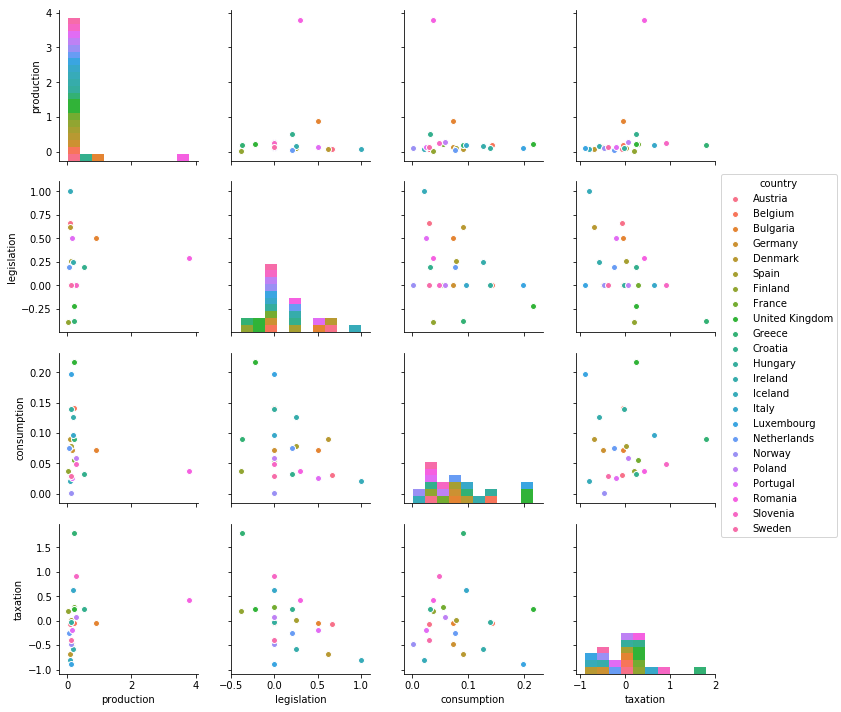

In [79]:
sns.pairplot(table, hue="country")

In [81]:
table.to_csv('energy.csv')